In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import geopandas
import contextily as cx
import matplotlib.pyplot as plt
import pickle
from shapely.geometry import Polygon
from utils import *
from region import Region
import shapely.geometry
import pandas as pd
from grid.grid import Grid

In [4]:
tk_cen_path = os.path.join("data","census","tk_summary.xlsx")
za_cen_path = os.path.join("data","census","za_summary.xlsx")
eg_cen_path = os.path.join("data","census","eg_summary.xlsx")

In [5]:
tk_cen = pd.read_excel(tk_cen_path, "mean")
za_cen = pd.read_excel(za_cen_path, "mean")
eg_cen = pd.read_excel(eg_cen_path, "mean")
tk_cen = tk_cen.groupby(["region","city","year"]).mean().reset_index()
za_cen = za_cen.groupby(["region","city","year"]).mean().reset_index()
eg_cen = eg_cen.groupby(["region","city","year"]).mean().reset_index()

In [6]:
Ordu = pickle.load(open(os.path.join("data","Ordu.pkl"),"rb"))
Trabzon = pickle.load(open(os.path.join("data","Trabzon.pkl"),"rb"))
Adana = pickle.load(open(os.path.join("data","Adana.pkl"),"rb"))
Manisa = pickle.load(open(os.path.join("data","Manisa.pkl"),"rb"))
Johannesburg = pickle.load(open(os.path.join("data","Johannesburg.pkl"),"rb"))
Cairo = pickle.load(open(os.path.join("data","Cairo.pkl"),"rb"))

In [7]:
lcz_path = os.path.join ('data','lcz','lcz_filter_v1.tif')

c = Region(Cairo.df, level = "NAME_1", name="cario", lcz_path=lcz_path)
c.inner_box.create_box([(30.4, 30.8),  (29.7, 31.8)])
c.outer_box.create_box([(31.4, 29.8),  (28.7, 32.8)])
# c.admin_region.select(["Al Qahirah"])

c.inner_box.bound_census(eg_cen,"city")
c.house = Cairo.house

In [8]:
pickle.dump(c, open(os.path.join("data","Cairo_v1.pkl"),"wb"))

<AxesSubplot:>

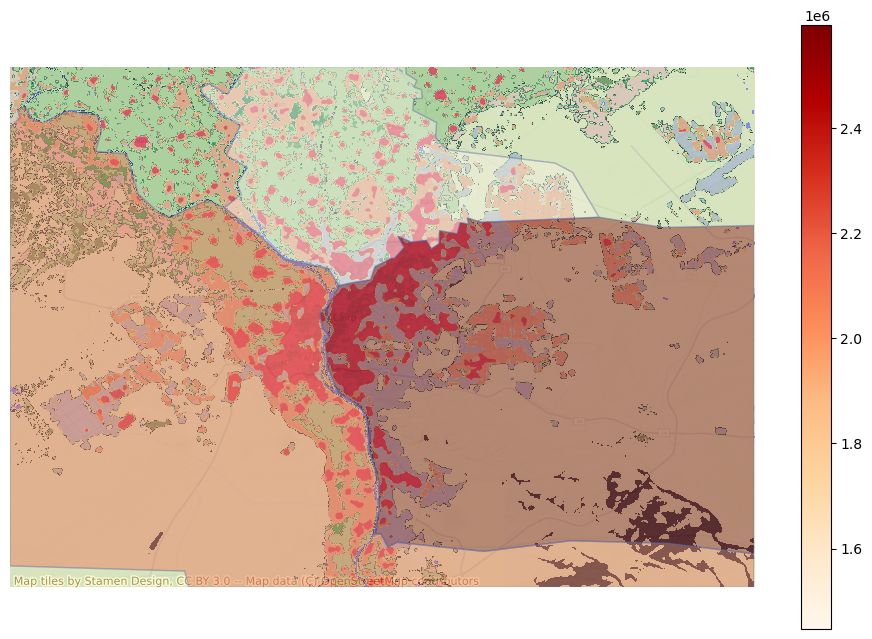

In [9]:
c.create_map_static("household_number")

In [10]:
grid = Grid(c, 500)

In [11]:
grid.create_cells_df()

nb cells :  44184840.0


In [12]:
grid.cells_df.head()

,geometry,ID
0,"POLYGON ((30.40000 29.70000, 30.40000 29.70390...",0
1,"POLYGON ((30.40449 29.70000, 30.40449 29.70390...",1
2,"POLYGON ((30.40898 29.70000, 30.40898 29.70390...",2
3,"POLYGON ((30.41347 29.70000, 30.41347 29.70390...",3
4,"POLYGON ((30.41797 29.70000, 30.41797 29.70390...",4


In [20]:
grid.set_LCZ()

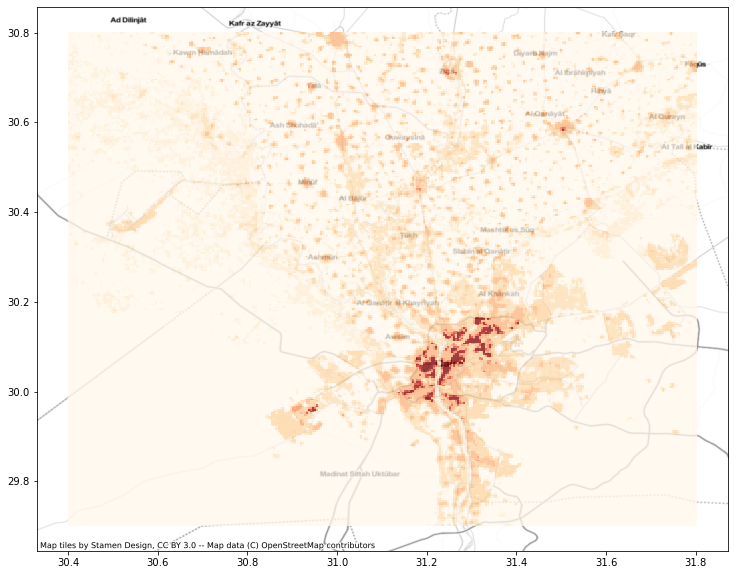

In [21]:
grid.plot_grid()

In [22]:
grid.cells_df['lcz'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: lcz, dtype: float64